In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## MAP 2D TEST

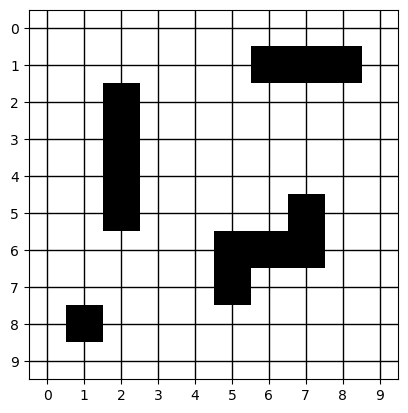

In [2]:
class Map2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def set_obstacle(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = 1
        else:
            raise ValueError("Coordinates out of bounds")

    def display(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.xticks(np.arange(0, self.width, 1))
        plt.yticks(np.arange(0, self.height, 1))
        plt.grid(color='k', linewidth=1)
        plt.show()


# Exemple d'utilisation :
map_grid = Map2D(10, 10)

# Définir des obstacles
map_grid.set_obstacle(2, 3)
map_grid.set_obstacle(2, 2)
map_grid.set_obstacle(2, 4)
map_grid.set_obstacle(2, 5)
map_grid.set_obstacle(5, 7)
map_grid.set_obstacle(6, 6)
map_grid.set_obstacle(6, 1)
map_grid.set_obstacle(5, 6)
map_grid.set_obstacle(7, 5)
map_grid.set_obstacle(7, 6)
map_grid.set_obstacle(8, 1)
map_grid.set_obstacle(7, 1)
map_grid.set_obstacle(1, 8)

# Afficher la carte
map_grid.display()

## MAP 3D à partir d'images


In [3]:
import cv2 

# Charger les images
img1 = cv2.imread('D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/BasCouloir1.jpg')
img2 = cv2.imread('D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/BasCouloir3.jpg')

# Convertir les images en niveaux de gris
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Détecter les points d'intérêt et calculer les descripteurs avec ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Effectuer le match des descripteurs
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Tri des correspondances par distance
matches = sorted(matches, key=lambda x: x.distance)

# Sélectionner les meilleures correspondances
good_matches = matches[:100]

# Extraire les points correspondants des deux images
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimer la matrice d'homographie
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Appliquer la transformation perspective pour aligner les images
aligned_img = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img2.shape[0]))
aligned_img[:img1.shape[0], :img1.shape[1]] = img1

# Afficher l'image alignée
cv2.imshow('Aligned Image', aligned_img)
cv2.waitKey(0)
cv2.destroyAllWindows()